In [2]:
# function to load the model from my repository

def get_dbn_library():
  files = ["DBN.py", "RBM.py", "GaussianBernoulliRBM.py"]
  repository_url = "https://raw.githubusercontent.com/mehulrastogi/Deep-Belief-Network-pytorch/master/"
  for file in files:
    ! wget -O {file} {repository_url}{file}

get_dbn_library()

import RBM as rbm
import DBN as dbn
import GaussianBernoulliRBM as GBrbm

--2022-04-24 22:49:13--  https://raw.githubusercontent.com/mehulrastogi/Deep-Belief-Network-pytorch/master/DBN.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5199 (5.1K) [text/plain]
Saving to: ‘DBN.py’

DBN.py              100%[===================>]   5.08K  --.-KB/s    in 0s      

2022-04-24 22:49:13 (49.3 MB/s) - ‘DBN.py’ saved [5199/5199]

--2022-04-24 22:49:13--  https://raw.githubusercontent.com/mehulrastogi/Deep-Belief-Network-pytorch/master/RBM.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7658 (7.5K) [text/plain

In [3]:
from GaussianBernoulliRBM import GaussianBernoulliRBM
import torch 
import torchvision
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader

import matplotlib
import matplotlib.pyplot as plt

import math
import sklearn
import numpy as np

In [4]:
#Loading MNIST dataset
mnist_data = datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([transforms.ToTensor()]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [5]:
from sklearn.preprocessing import StandardScaler
train_data = mnist_data.train_data.numpy().astype(np.float64)
train_data = train_data.reshape(train_data.shape[0] , -1)

scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
train_data = train_data.reshape(train_data.shape[0],28,28)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [6]:
#Normalizing the training data so that we can train our gaussian BernoulliRBM
mnist_data.train_data = torch.from_numpy(train_data).type(torch.FloatTensor)

print(mnist_data.train_data.shape)

AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


The number shown is the number: 2


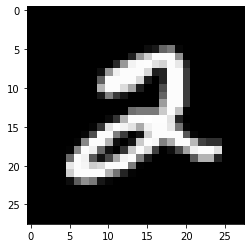

In [7]:
#Lets us visualize a number from the data set
idx = 5
img = mnist_data.train_data[idx]
print("The number shown is the number: {}".format(mnist_data.train_labels[idx]) )
plt.imshow(img , cmap = 'gray')
plt.show()

In [8]:
# If we train on the whole set we expect it to learn to detect edges.
batch_size= 10
tensor_x = mnist_data.train_data.type(torch.FloatTensor) # transform to torch tensors
tensor_y = mnist_data.train_labels.type(torch.FloatTensor)
_dataset = torch.utils.data.TensorDataset(tensor_x,tensor_y) # create your datset
train_loader = torch.utils.data.DataLoader(_dataset,
                    batch_size=batch_size, shuffle=True,drop_last = True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [9]:
# I have have set these hyper parameters although you can experiment with them to find better hyperparameters.
visible_units=28*28
hidden_units = 500
k=3
learning_rate=0.001
learning_rate_decay = True
xavier_init = True
increase_to_cd_k = False
use_gpu = False


rbm_mnist = GaussianBernoulliRBM(visible_units,hidden_units,k ,learning_rate,learning_rate_decay,xavier_init,
                increase_to_cd_k,use_gpu)

In [10]:
epochs = 1

rbm_mnist.train(train_loader , epochs,batch_size)

RBM fitting: 6000it [00:37, 157.96it/s]
Epoch:1 ,avg_cost = 38348.515625 ,std_cost = 5574.4921875 ,avg_grad = 4987560.5 ,std_grad = 656591.25


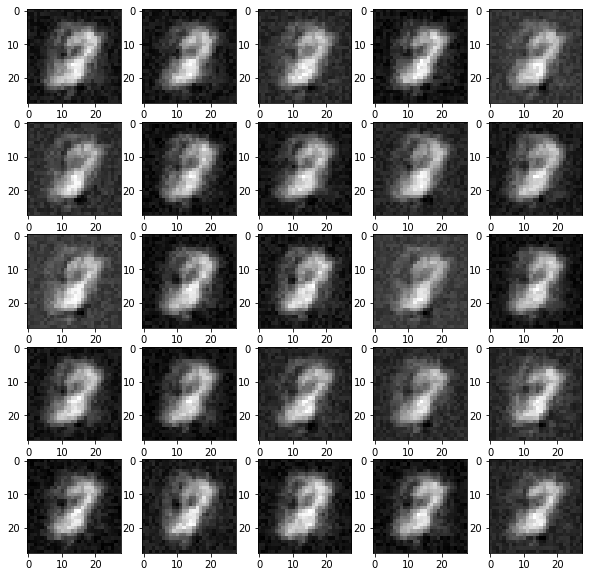

In [11]:
learned_weights = rbm_mnist.W.transpose(0,1).numpy()
plt.show()
fig = plt.figure(3, figsize=(10,10))
for i in range(25): 
    sub = fig.add_subplot(5, 5, i+1)
    sub.imshow(learned_weights[i,:].reshape((28,28)), cmap=plt.cm.gray)
plt.show()